In [1]:
import pathlib
from typing import List, Dict

import matplotlib as mpl
import pandas as pd
import scanpy as sc
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

# Configuration
BASE_DIR = pathlib.Path("..")
DATA_DIR = BASE_DIR / "../data/annotation/sharing"
OUTPUT_DIR = BASE_DIR / "figures/paper figures/EDFigure11"
SCRIPT_DIR = BASE_DIR / "scripts"
METHOD = "t-test"
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
H5AD_FILE = DATA_DIR / "all_sharing.h5ad.gz"
USE_FILTERED_GENES = True
# New configuration for tissue combinations to process

TISSUE_COMBOS_TO_PROCESS = ['LN_SP']  # Add the specific combinations you want, or set to None for all
TISSUE_COMBO_TO_COLUMN = {
    'LN_LN': 'shared_LN_LN',
    'LN_SP': 'shared_LN_SP',
    'LN_PB': 'shared_LN_PB',
    "BM_PB": 'shared_BM_PB',
    "SP_PB": 'shared_SP_PB',
    "SP_BM": 'shared_SP_BM',
    'LN_BM': 'shared_LN_BM',   
}

# Figure settings
SAVEFIG_ARGS = {
    "dpi": 300,
    "bbox_inches": "tight",
    "pad_inches": 0.1,
    "transparent": True,
}
OUTPUT_FORMATS = [".png", ".pdf"]
OUTPUT_SUFFIX = ""

def setup_plotting():
    """Set up plotting parameters for consistent figure output."""
    mpl.rc("savefig", dpi=300)
    sc.set_figure_params(scanpy=False,
        dpi_save=150,
        frameon=False,
        vector_friendly=True,
        fontsize=6,
        figsize=(3,3),
        format='pdf',
        transparent=True
    )
    sns.set_style("ticks")
    plt.style.use(SCRIPT_DIR / 'bursa.mplstyle')

def setup_plotting():
    """Set up plotting parameters for consistent figure output."""
    mpl.rc("savefig", dpi=300)
    sc.set_figure_params(scanpy=False,
        dpi_save=150,
        frameon=False,
        vector_friendly=True,
        fontsize=6,
        figsize=(3,3),
        format='pdf',
        transparent=True
    )
    sns.set_style("ticks")
    plt.style.use(SCRIPT_DIR / 'bursa.mplstyle')

def plot_custom_dotplot(ad: sc.AnnData, markers: List[str]):
    """Create a custom dot plot for gene expression analysis."""
    print(f"Unique values in 'shared' column: {ad.obs['shared'].unique()}")
    
    # Remove NaN values and ensure both categories are present
    ad = ad[~ad.obs['shared'].isna()].copy()
    ad.obs['shared'] = ad.obs['shared'].astype('category')
    
    if len(ad.obs['shared'].cat.categories) < 2:
        print("Warning: Only one category present after removing NaNs. Cannot create dotplot.")
        return None

    # Ensure both True and False categories are present
    categories_order = ['True', 'False']
    ad.obs['shared'] = ad.obs['shared'].cat.set_categories(categories_order)

    fig, ax = plt.subplots(figsize=(3, 2.25))  # Increased width to accommodate both categories
    dp = sc.pl.DotPlot(ad, markers, groupby='shared', ax=ax, vmax=2, vmin=0, expression_cutoff=0,
                       categories_order=categories_order)
    dp.legend(width=0.8)
    dp.swap_axes()
    dp.add_totals(color='0.4', size=0.3).style(dot_edge_color='black', largest_dot=30, dot_edge_lw=0.2, cmap='Purples').show()

    axes = dp.get_axes()

    for child in axes['group_extra_ax'].get_children():
        if isinstance(child, mpl.text.Annotation):
            child.set(rotation=90, verticalalignment='bottom')

    axes['size_legend_ax'].set_title("")
    axes['size_legend_ax'].tick_params(axis='x', which='minor', length=0)
    axes['size_legend_ax'].tick_params(axis='x', labelsize=5)

    title = "% cells\nexpression > 0"
    axes['size_legend_ax'].text(0, 0.8, title, transform=axes['size_legend_ax'].transAxes, 
                                va='center', ha='left', fontsize=5)

    title = "Mean Expression\n($log_2$ UMI per 10K)"
    axes['color_legend_ax'].set_title("")
    axes['color_legend_ax'].text(0, 2.2, title, transform=axes['color_legend_ax'].transAxes, 
                                va='center', ha='left', fontsize=5)
    axes['color_legend_ax'].tick_params(axis='x', labelsize=5)

    for bar in axes['group_extra_ax'].patches:
        bar.set_edgecolor('none')

    plt.tight_layout()  # Adjust the layout
    return fig  # Return the figure object instead of the DotPlot object

def plot_custom_dotplot(ad: sc.AnnData, markers: List[str]):
    """Create a custom dot plot for gene expression analysis."""
    print(f"Original shape of AnnData: {ad.shape}")
    print(f"Unique values in 'shared' column: {ad.obs['shared'].unique()}")
    print(f"Value counts of 'shared' column:\n{ad.obs['shared'].value_counts(dropna=False)}")
    
    # Remove NaN values and ensure both categories are present
    ad = ad[~ad.obs['shared'].isna()].copy()
    ad.obs['shared'] = ad.obs['shared'].astype('category')
    
    print(f"Shape after removing NaNs: {ad.shape}")
    print(f"Value counts after removing NaNs:\n{ad.obs['shared'].value_counts()}")
    
    if len(ad.obs['shared'].cat.categories) < 2:
        print("Warning: Only one category present after removing NaNs. Cannot create dotplot.")
        return None

    # Ensure both True and False categories are present
    categories_order = ['True', 'False']
    ad.obs['shared'] = ad.obs['shared'].cat.set_categories(categories_order)

    # Check if markers are in the data
    valid_markers = [marker for marker in markers if marker in ad.var_names]
    if not valid_markers:
        print("Error: None of the specified markers are in the data.")
        return None
    
    print(f"Valid markers: {valid_markers}")

    fig, ax = plt.subplots(figsize=(3, 2.25))
    try:
        dp = sc.pl.DotPlot(ad, valid_markers, groupby='shared', ax=ax, vmax=2, vmin=0, expression_cutoff=0,
                           categories_order=categories_order)
        dp.legend(width=0.8)
        dp.swap_axes()
        dp.add_totals(color='0.4', size=0.3).style(dot_edge_color='black', largest_dot=30, dot_edge_lw=0.2, cmap='Purples').show()

        axes = dp.get_axes()

        for child in axes['group_extra_ax'].get_children():
            if isinstance(child, mpl.text.Annotation):
                child.set(rotation=90, verticalalignment='bottom')

        axes['size_legend_ax'].set_title("")
        axes['size_legend_ax'].tick_params(axis='x', which='minor', length=0)
        axes['size_legend_ax'].tick_params(axis='x', labelsize=5)

        title = "% cells\nexpression > 0"
        axes['size_legend_ax'].text(0, 0.8, title, transform=axes['size_legend_ax'].transAxes, 
                                    va='center', ha='left', fontsize=5)

        title = "Mean Expression\n($log_2$ UMI per 10K)"
        axes['color_legend_ax'].set_title("")
        axes['color_legend_ax'].text(0, 2.2, title, transform=axes['color_legend_ax'].transAxes, 
                                    va='center', ha='left', fontsize=5)
        axes['color_legend_ax'].tick_params(axis='x', labelsize=5)

        for bar in axes['group_extra_ax'].patches:
            bar.set_edgecolor('none')

        plt.tight_layout()
        return fig
    except Exception as e:
        print(f"Error creating dotplot: {str(e)}")
        return None

def process_adata(adata: sc.AnnData, tissue_combo: str, descriptor: str, method: str = 'wilcoxon'):
    """Process AnnData object for a specific tissue combination and descriptor."""
    adata.obs.loc[:,'shared'] = adata.obs[TISSUE_COMBO_TO_COLUMN[tissue_combo]]
    print(f"{adata.shape[0]} cells")
    adata.obs['shared'] = adata.obs.shared.astype('category')
    adata.obs.shared = adata.obs.shared.cat.remove_unused_categories()
    print(f"{adata.shape[0]} cells after removing nans in shared")
    print(f"\n{tissue_combo}\n{descriptor}\n\n")
    print(f"Value counts for 'shared' column:\n{adata.obs['shared'].value_counts()}")

    sc.tl.rank_genes_groups(adata, groupby='shared', method=method, pts=True)
    sc.pl.rank_genes_groups(adata, key='rank_genes_groups')
    sc.tl.filter_rank_genes_groups(adata, min_fold_change=0.7, min_in_group_fraction=0.2, max_out_group_fraction=0.7)

    return adata

def get_markers(adata: sc.AnnData, use_filtered_genes: bool = True):
    """Get marker genes for dotplot."""
    if use_filtered_genes:
        true_markers = sc.get.rank_genes_groups_df(adata, group="True", key='rank_genes_groups_filtered').dropna(subset='names')['names'][:6].tolist()
        false_markers = sc.get.rank_genes_groups_df(adata, group="False", key='rank_genes_groups_filtered').dropna(subset='names')['names'][:6].tolist()
    else:
        true_markers = sc.get.rank_genes_groups_df(adata, group="True", key='rank_genes_groups')['names'][:6].tolist()
        false_markers = sc.get.rank_genes_groups_df(adata, group="False", key='rank_genes_groups')['names'][:6].tolist()
    
    print(f"True markers: {true_markers}")
    print(f"False markers: {false_markers}")
    
    return true_markers + false_markers

def save_results(adata: sc.AnnData, tissue_combo: str, descriptor: str):
    """Save differential expression results."""
    folder_path = DATA_DIR.parent / tissue_combo / descriptor
    folder_path.mkdir(parents=True, exist_ok=True)
    print(f"Created {folder_path}")

    sc.get.rank_genes_groups_df(adata, group="True", key='rank_genes_groups').to_csv(folder_path / "de_genes.tab", sep='\t')
    sc.get.rank_genes_groups_df(adata, group="True", key='rank_genes_groups_filtered').to_csv(folder_path / "filtered_de_genes_true.tab", sep='\t')
    sc.get.rank_genes_groups_df(adata, group="False", key='rank_genes_groups_filtered').to_csv(folder_path / "filtered_de_genes_false.tab", sep='\t')

def remove_genes_from_adata(adata: sc.AnnData, genes_to_remove: List[str]) -> sc.AnnData:
    """Remove specified genes from the AnnData object."""
    genes_to_keep = [gene for gene in adata.var_names if gene not in genes_to_remove]
    return adata[:, genes_to_keep].copy()

Loading data...


/home/michaelswift/miniconda3/envs/bursa2ndary/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obj[key] = value


89201 cells
89201 cells after removing nans in shared

LN_SP
mb_cells


Value counts for 'shared' column:
shared
False    73499
True      2119
Name: count, dtype: int64


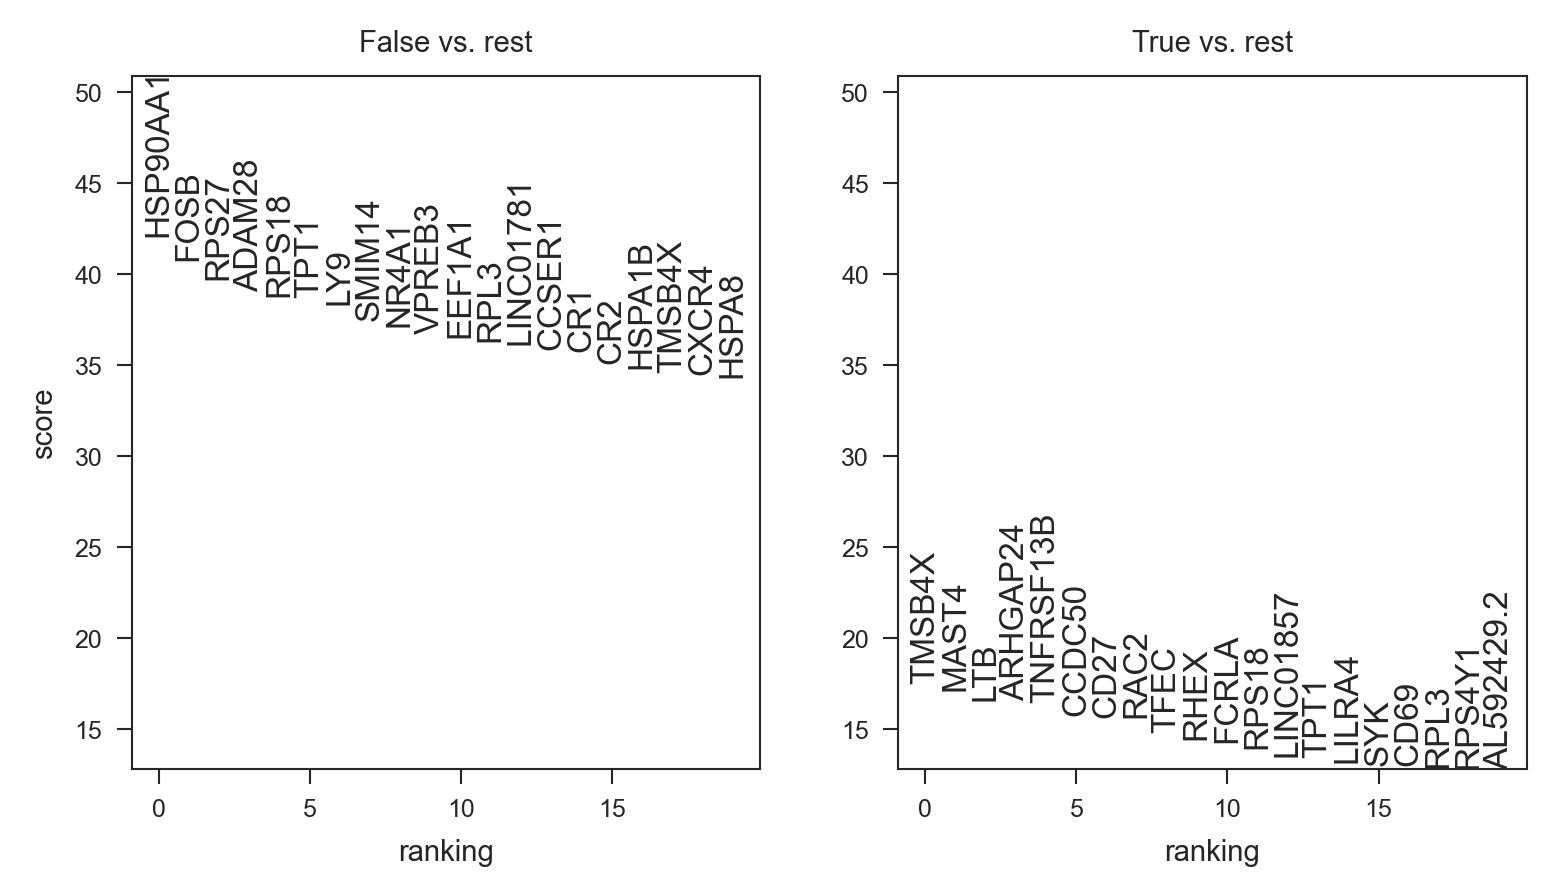

True markers: ['MAST4', 'LTB', 'TFEC', 'RHEX', 'LILRA4', 'AL592429.2']
False markers: ['LY9', 'NR4A1', 'LINC01781', 'CCSER1', 'CR1', 'CR2']
Unique values in 'shared' column: [False, NaN, True]
Categories (2, bool): [False, True]


/home/michaelswift/miniconda3/envs/bursa2ndary/lib/python3.12/site-packages/anndata/_core/anndata.py:841: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['False', 'False', 'False', 'False', 'False']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "obs")


Number of cells in each category:
shared
False    73499
True      2119
Name: count, dtype: int64
Markers to be plotted: ['MAST4', 'LTB', 'TFEC', 'RHEX', 'LILRA4', 'AL592429.2', 'LY9', 'NR4A1', 'LINC01781', 'CCSER1', 'CR1', 'CR2']
Markers present in data: ['MAST4', 'LTB', 'TFEC', 'RHEX', 'LILRA4', 'AL592429.2', 'LY9', 'NR4A1', 'LINC01781', 'CCSER1', 'CR1', 'CR2']
Error creating dotplot: Given group shared is both and index and a column level, which is ambiguous.
Skipped dotplot for LN_SP, mb_cells due to insufficient data
Created ../../data/annotation/LN_SP/mb_cells


/home/michaelswift/miniconda3/envs/bursa2ndary/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obj[key] = value


26366 cells
26366 cells after removing nans in shared

LN_SP
as_cells


Value counts for 'shared' column:
shared
False    15790
True      1776
Name: count, dtype: int64


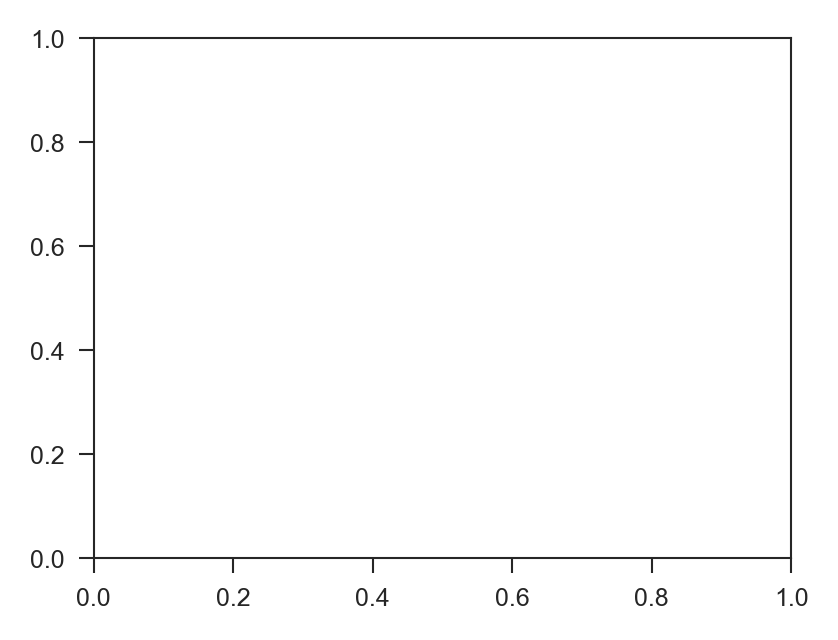

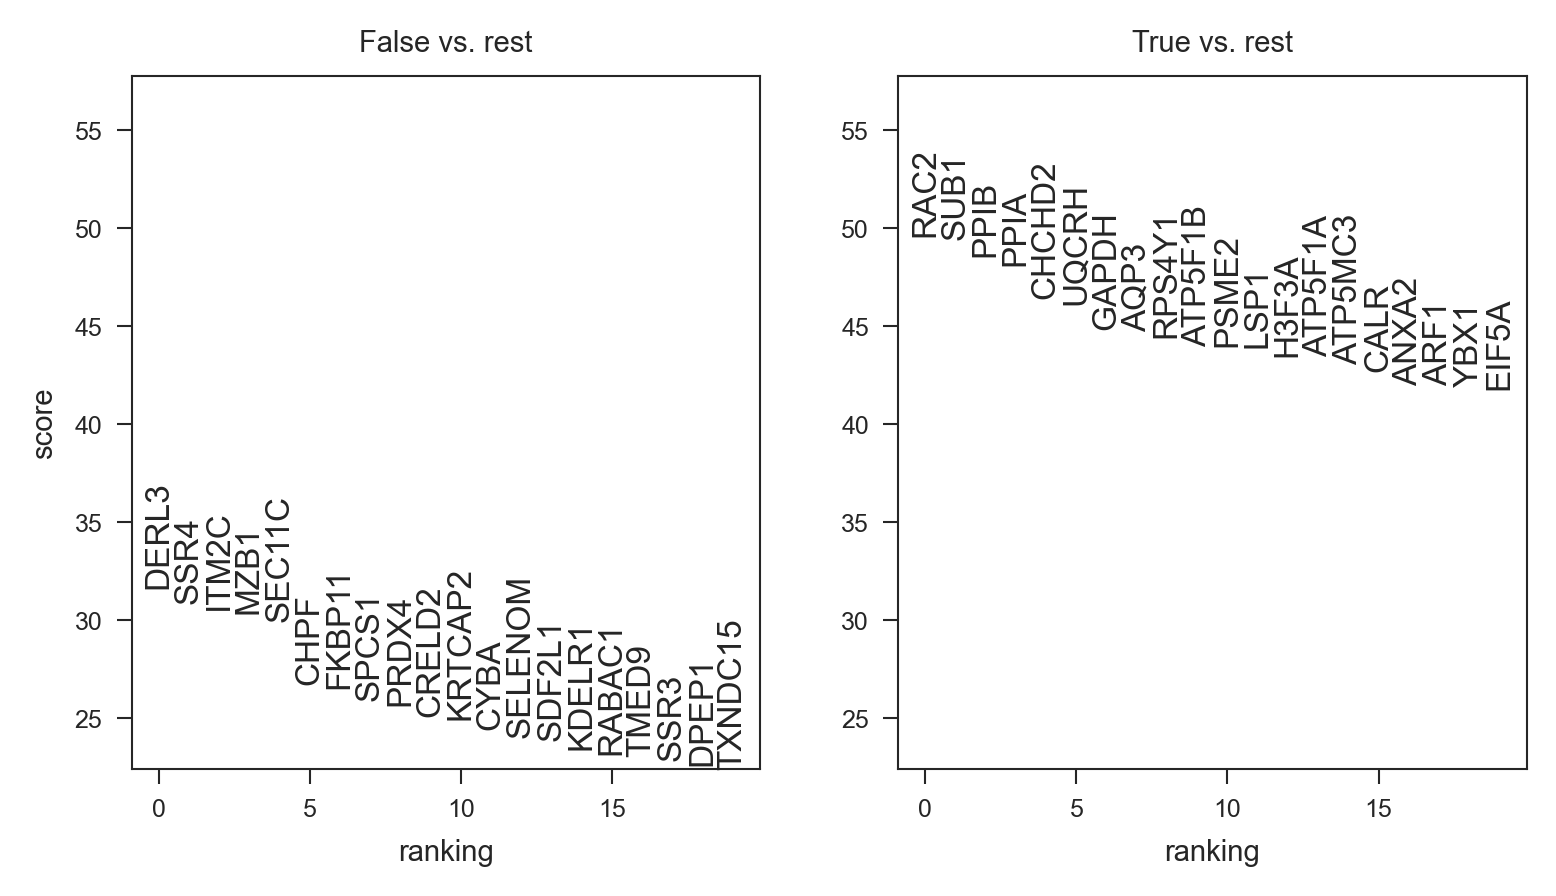

True markers: ['RAC2', 'AQP3', 'RPS4Y1', 'ATP5F1B', 'PSME2', 'LSP1']
False markers: ['CHPF', 'SELENOM', 'DPEP1', 'LINC00877', 'RASD1', 'AC012645.3']
Unique values in 'shared' column: [False, NaN, True]
Categories (2, bool): [False, True]


/home/michaelswift/miniconda3/envs/bursa2ndary/lib/python3.12/site-packages/anndata/_core/anndata.py:841: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['False', 'False', 'False', 'False', 'False']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "obs")


Number of cells in each category:
shared
False    15790
True      1776
Name: count, dtype: int64
Markers to be plotted: ['RAC2', 'AQP3', 'RPS4Y1', 'ATP5F1B', 'PSME2', 'LSP1', 'CHPF', 'SELENOM', 'DPEP1', 'LINC00877', 'RASD1', 'AC012645.3']
Markers present in data: ['RAC2', 'AQP3', 'RPS4Y1', 'ATP5F1B', 'PSME2', 'LSP1', 'CHPF', 'SELENOM', 'DPEP1', 'LINC00877', 'RASD1', 'AC012645.3']
Error creating dotplot: Given group shared is both and index and a column level, which is ambiguous.
Skipped dotplot for LN_SP, as_cells due to insufficient data
Created ../../data/annotation/LN_SP/as_cells


/home/michaelswift/miniconda3/envs/bursa2ndary/lib/python3.12/site-packages/pandas/core/indexing.py:1857: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self.obj[key] = value


43590 cells
43590 cells after removing nans in shared

LN_SP
LN_only


Value counts for 'shared' column:
shared
False    42418
True      1172
Name: count, dtype: int64


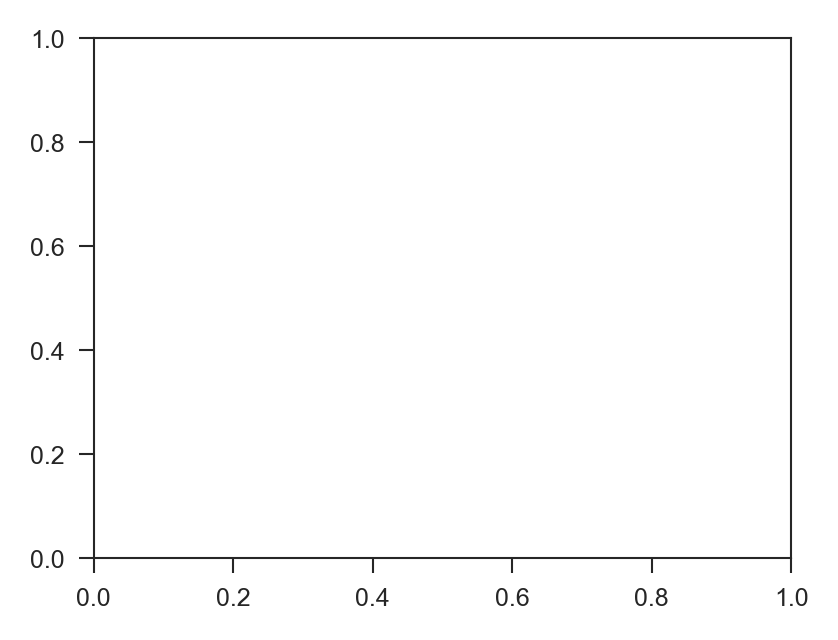

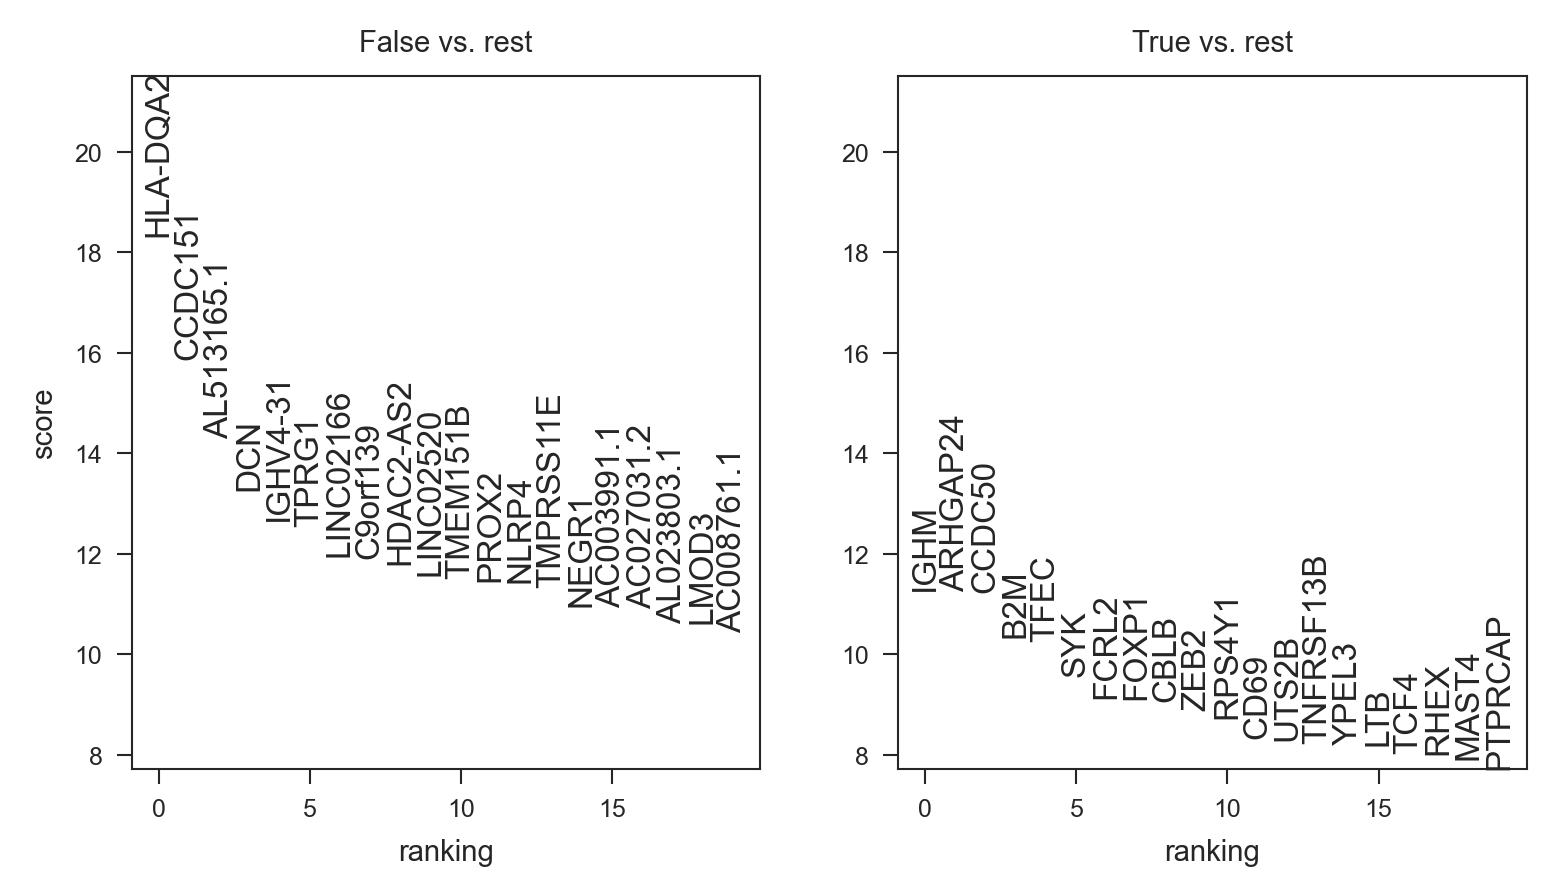

True markers: ['IGHM', 'TFEC', 'FCRL2', 'CBLB', 'ZNF804A', 'FCRL3']
False markers: ['HLA-DQA2', 'MYADM']
Unique values in 'shared' column: [False, True]
Categories (2, bool): [False, True]


/home/michaelswift/miniconda3/envs/bursa2ndary/lib/python3.12/site-packages/anndata/_core/anndata.py:841: UserWarning: 
AnnData expects .obs.index to contain strings, but got values like:
    ['False', 'False', 'False', 'False', 'False']

    Inferred to be: categorical

  names = self._prep_dim_index(names, "obs")


Number of cells in each category:
shared
False    42418
True      1172
Name: count, dtype: int64
Markers to be plotted: ['IGHM', 'TFEC', 'FCRL2', 'CBLB', 'ZNF804A', 'FCRL3', 'HLA-DQA2', 'MYADM']
Markers present in data: ['IGHM', 'TFEC', 'FCRL2', 'CBLB', 'ZNF804A', 'FCRL3', 'HLA-DQA2', 'MYADM']
Error creating dotplot: Given group shared is both and index and a column level, which is ambiguous.
Skipped dotplot for LN_SP, LN_only due to insufficient data
Created ../../data/annotation/LN_SP/LN_only
Analysis complete. Results saved.


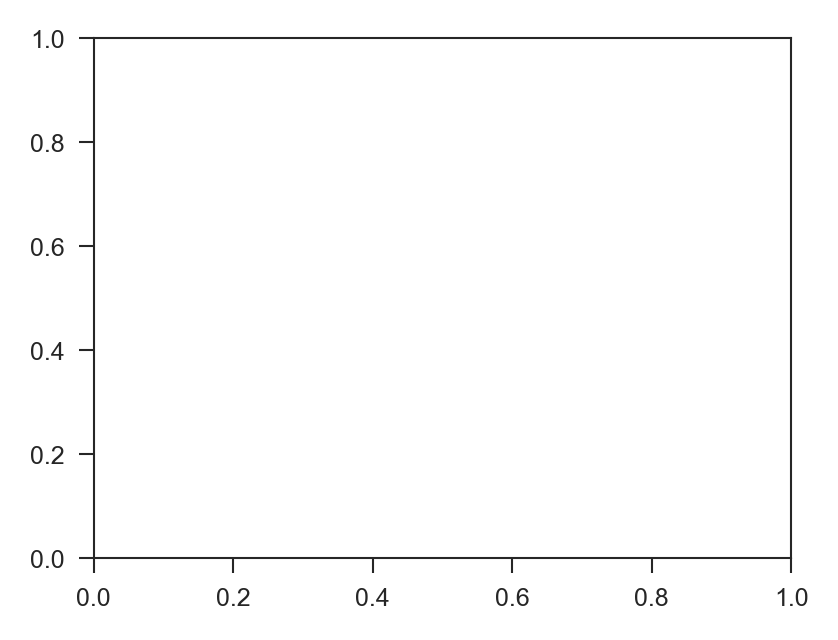

In [2]:
def plot_custom_dotplot(ad: sc.AnnData, markers: List[str]):
    """Create a custom dot plot for gene expression analysis."""
    print(f"Unique values in 'shared' column: {ad.obs['shared'].unique()}")
    
    # Remove NaN values and ensure both categories are present
    ad = ad[~ad.obs['shared'].isna()].copy()
    ad.obs['shared'] = ad.obs['shared'].astype('category')
    
    if len(ad.obs['shared'].cat.categories) < 2:
        print("Warning: Only one category present after removing NaNs. Cannot create dotplot.")
        return None

    # Ensure both True and False categories are present
    categories_order = ['True', 'False']
    ad.obs['shared'] = ad.obs['shared'].astype(str).astype('category').cat.set_categories(categories_order)
    
    # Set 'shared' as the index for plotting
    ad.obs_names = ad.obs['shared']

    print(f"Number of cells in each category:")
    print(ad.obs['shared'].value_counts(dropna=False))
    print(f"Markers to be plotted: {markers}")
    print(f"Markers present in data: {[m for m in markers if m in ad.var_names]}")

    fig, ax = plt.subplots(figsize=(3, 2.25))  # Increased width to accommodate both categories
    try:
        dp = sc.pl.DotPlot(ad, markers, groupby='shared', ax=ax, vmax=2, vmin=0, expression_cutoff=0,
                           categories_order=categories_order)
        dp.legend(width=0.8)
        dp.swap_axes()
        dp.add_totals(color='0.4', size=0.3).style(dot_edge_color='black', largest_dot=30, dot_edge_lw=0.2, cmap='Purples').show()

        axes = dp.get_axes()

        for child in axes['group_extra_ax'].get_children():
            if isinstance(child, mpl.text.Annotation):
                child.set(rotation=90, verticalalignment='bottom')

        axes['size_legend_ax'].set_title("")
        axes['size_legend_ax'].tick_params(axis='x', which='minor', length=0)
        axes['size_legend_ax'].tick_params(axis='x', labelsize=5)

        title = "% cells\nexpression > 0"
        axes['size_legend_ax'].text(0, 0.8, title, transform=axes['size_legend_ax'].transAxes, 
                                    va='center', ha='left', fontsize=5)

        title = "Mean Expression\n($log_2$ UMI per 10K)"
        axes['color_legend_ax'].set_title("")
        axes['color_legend_ax'].text(0, 2.2, title, transform=axes['color_legend_ax'].transAxes, 
                                    va='center', ha='left', fontsize=5)
        axes['color_legend_ax'].tick_params(axis='x', labelsize=5)

        for bar in axes['group_extra_ax'].patches:
            bar.set_edgecolor('none')

        plt.tight_layout()  # Adjust the layout
        return fig  # Return the figure object instead of the DotPlot object
    except Exception as e:
        print(f"Error creating dotplot: {str(e)}")
        return None
    

def main():
    """Main function to run the analysis pipeline."""
    setup_plotting()

    print("Loading data...")
    adata = sc.read_h5ad(H5AD_FILE)

    mb_adata = adata[adata.obs.celltypist.str.contains('Memory B|Age|Prolif')]
    asc_adata = adata[adata.obs.celltypist.str.contains("Plasma")]
    mb_adata_LN = mb_adata[mb_adata.obs.tissue == 'LN']

    adata_dict = {'mb_cells': mb_adata, 'as_cells': asc_adata, 'LN_only': mb_adata_LN}

    # Determine which tissue combinations to process
    tissue_combos_to_process = TISSUE_COMBOS_TO_PROCESS if TISSUE_COMBOS_TO_PROCESS is not None else TISSUE_COMBO_TO_COLUMN.keys()

    for tissue_combo in tissue_combos_to_process:
        if tissue_combo not in TISSUE_COMBO_TO_COLUMN:
            print(f"Warning: {tissue_combo} is not a valid tissue combination. Skipping.")
            continue

        for descriptor, ad in adata_dict.items():
            ad = process_adata(ad, tissue_combo, descriptor, method=METHOD)
            
            # Get differential expression results
            dedf_True = sc.get.rank_genes_groups_df(ad, group="True", key='rank_genes_groups')
            dedf_False = sc.get.rank_genes_groups_df(ad, group="False", key='rank_genes_groups')
            dedf_filtered_true = sc.get.rank_genes_groups_df(ad, group="True", key='rank_genes_groups_filtered')
            dedf_filtered_false = sc.get.rank_genes_groups_df(ad, group="False", key='rank_genes_groups_filtered')
            # Select markers for dotplot
            if USE_FILTERED_GENES:
                true_markers = dedf_filtered_true.dropna(subset='names')['names'][:6].tolist()
                false_markers = dedf_filtered_false.dropna(subset='names')['names'][:6].tolist()
            else:
                true_markers = dedf_True['names'][:6].tolist()
                false_markers = dedf_False['names'][:6].tolist()
            markers = true_markers + false_markers
            
            print(f"True markers: {true_markers}")
            print(f"False markers: {false_markers}")

            # In the main() function, replace the dotplot creation and saving part with:
            try:
                fig = plot_custom_dotplot(ad, markers)
                if fig is not None:
                    figure_folder = OUTPUT_DIR / tissue_combo / descriptor
                    figure_folder.mkdir(parents=True, exist_ok=True)
                    for fmt in OUTPUT_FORMATS:
                        fig.savefig(figure_folder / f"dotplot{OUTPUT_SUFFIX}{fmt}", **SAVEFIG_ARGS)
                    print(f"Saved dotplot for {tissue_combo}, {descriptor}")
                    plt.close(fig)
                else:
                    print(f"Skipped dotplot for {tissue_combo}, {descriptor} due to insufficient data")
            except Exception as e:
                print(f"Dot plot failed for {tissue_combo}, {descriptor}. Error: {str(e)}")
                print("Dot plot tried with", len(markers), "markers, could be an issue")

            save_results(ad, tissue_combo, descriptor)

    print("Analysis complete. Results saved.")

if __name__ == "__main__":
    main()